# Próbkowanie i kwantyzacja

## Twierdzenie Nyquista/Shannona

Wiemy co to jest częstotliwość próbkowania, ale jaką ona powinna mieć wartość? Jaka jest minimalna ilość próbek (minimalna zajętość pamięci) wymagana żeby zachować optymalną jakość sygnału?

Otóż, odpowiedź jest dosyć prosta, ale zanim podamy twierdzenie, zróbmy kilka eksperymentów, żeby zobaczyć podstawowe jego cechy.

Wygenerujmy i narysujmy 1 sekundę sygnału o częstotliwości 1 Hz oraz jednostkowej amplitudzie oraz zerowej fazie. Jaka jest minimalna ilość próbek potrzebna żeby zachować kształt sinusoidy? Jak jest w przypadku sygnału 2 Hz? 3 Hz?

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


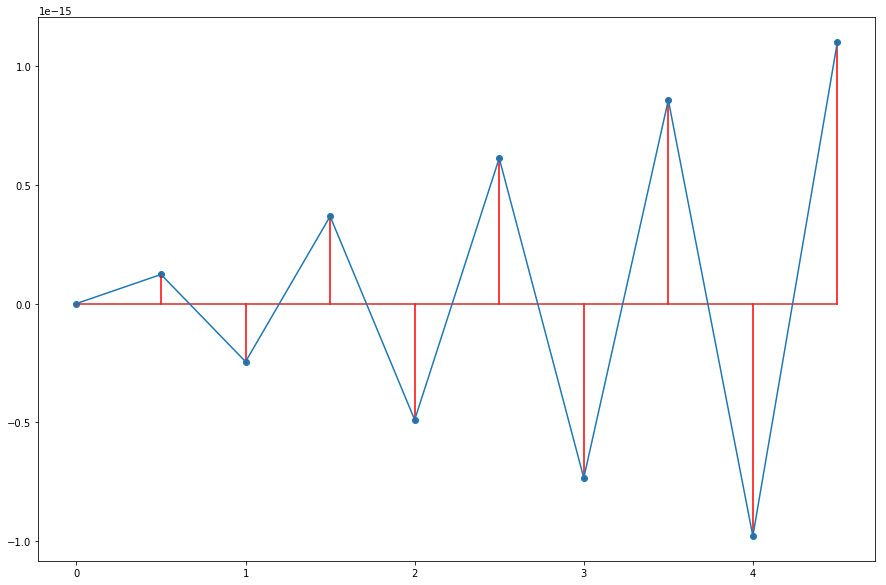

In [3]:
T = 5
Fs = 2
f = 1

t = arange(0, T, 1/Fs)
y = sin(2*pi*f*t)

figure(figsize=(15, 10))
stem(t, y, 'r')
plot(t, y)

To ćwiczenie może i nie należy do najłatwiejszych. Spróbujmy więc podejść do problemu od drugiej strony. Załóżmy, że częstotliwość próbkowania jest stała i wynosi 10 Hz. Jakie sygnały możemy wygenerować używając tylko 10 próbek? Jak wygląda sygnał o częstotliwości 1 Hz? A 4 Hz? 5 Hz? 6 Hz? 9Hz? 10 Hz? 11 Hz? Spróbuj wygenerować inne częstotliwości. Jakie sygnały wyglądają podobnie, a jakie się różnią?

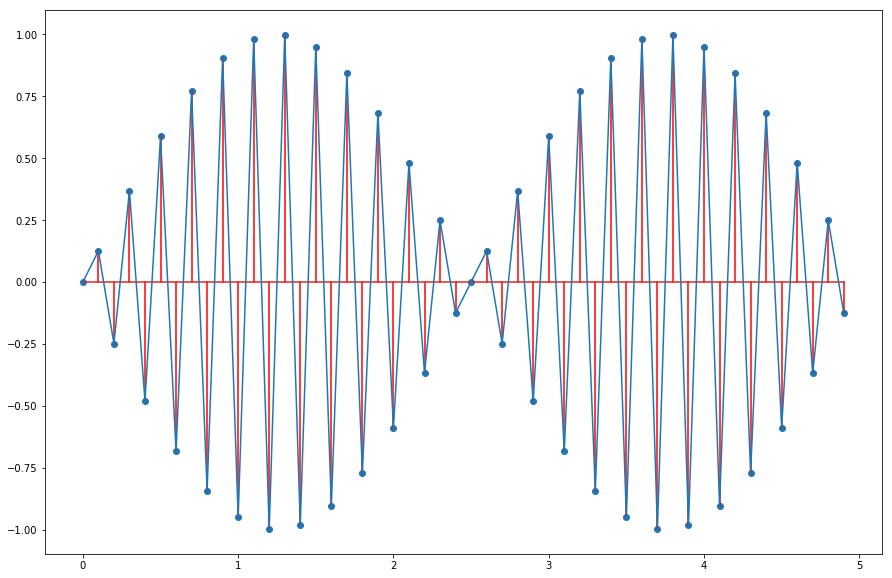

In [4]:
Fs = 10

t = arange(0, 5, 1/Fs)

def s(f):
    return sin(2*pi*f*t)

f = 4.8
figure(figsize=(15, 10))
stem(t, s(f), 'r')
plot(t, s(f))

Możemy pójść o krok dalej. Wygenerujmy sygnał sinusoidalny, gdzie parametr częstotliwości jest liczbą rzeczywistą zmieniająca się w czasie od 1 Hz do dwukrotności częstotliwości próbkowania. Długość sygnału możesz ustawić na 10 sekund, a częstotliwość próbkowania na 1000 Hz. Co się dzieję z sygnałem? Odtwórz go.

(0, 1)

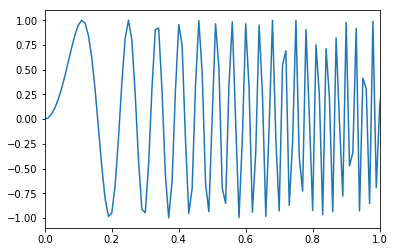

In [5]:
T = 10
Fs = 100

t = arange(0, T, 1/Fs)
f = linspace(0, 2*Fs, t.size)

plot(t, s(f))
xlim(0, 1)

Użyj poniższej funkcji *pyplot.specgram* aby zobacyzć widmo sygnału (o tym na następnym ćwiczeniu). Jako pierwszy arguemnt podaj sygnał, a jako drugi (o nazwie Fs) podaj częstotliwość próbkowania. Jak się ten wykres ma do brzmienia sygnału? 

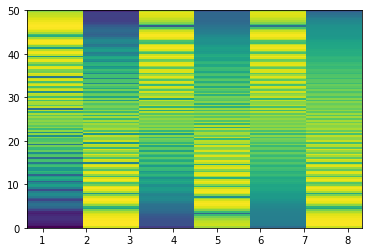

In [6]:
_ = specgram(s(f), Fs=Fs)

# Rozdzielczość bitowa

Otwórz plik WAV standardową biblioteką 'wave' i podaj jakie on ma parametry (użyj metody getparams). Więcej informacji na temat tej biblioteki znajdziesz tutaj:

https://docs.python.org/2/library/wave.html

In [108]:
import wave

f = wave.open("zdanie.wav")

print(f.getparams())
f.close()

_wave_params(nchannels=1, sampwidth=2, framerate=48000, nframes=270468, comptype='NONE', compname='not compressed')


Wczytaj teraz plik do pamięci, ale użyj o wiele wygodniejszej metody z biblioteki scipy:

http://docs.scipy.org/doc/scipy/reference/generated/scipy.io.wavfile.read.html

Narysuj i odtwórz dany plik.

48000
270468


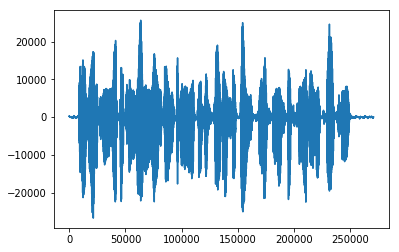

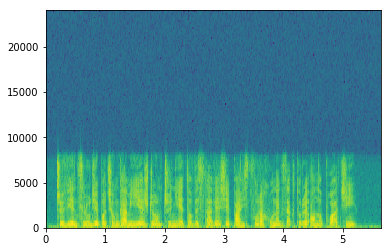

In [8]:
from scipy.io.wavfile import read 

fs, y = read("zdanie.wav")

print(fs)
print(y.size)

plot(y)
figure()
_ = specgram(y, Fs=fs)

Dokonaj kwantyzacji pliku używając mniejszej ilości bitów na próbkę. Odtwórz dźwięk i porównaj z oryginałem. Co można usłyszeć? Oblicz różnicę między nagraniem oryginalnym i przetworzonym i odtwórz. Czy się charakteryzuje ta różnica?

/usr/local/lib/python3.4/dist-packages/matplotlib/axes/_axes.py:7235: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


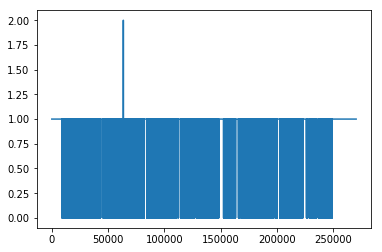

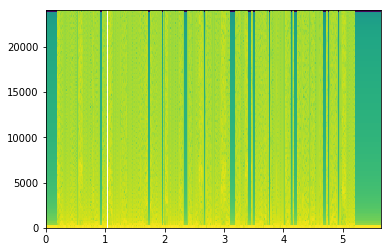

In [9]:
from ipywidgets import HTML
from IPython.display import display
from IPython.display import Audio
from scipy.io.wavfile import read 

z = y.astype(float) - y.min()
z = z/z.max()
z = floor(2*z)

plot(z)
figure()
_ = specgram(z, Fs=fs)

display(Audio(z, rate=fs))

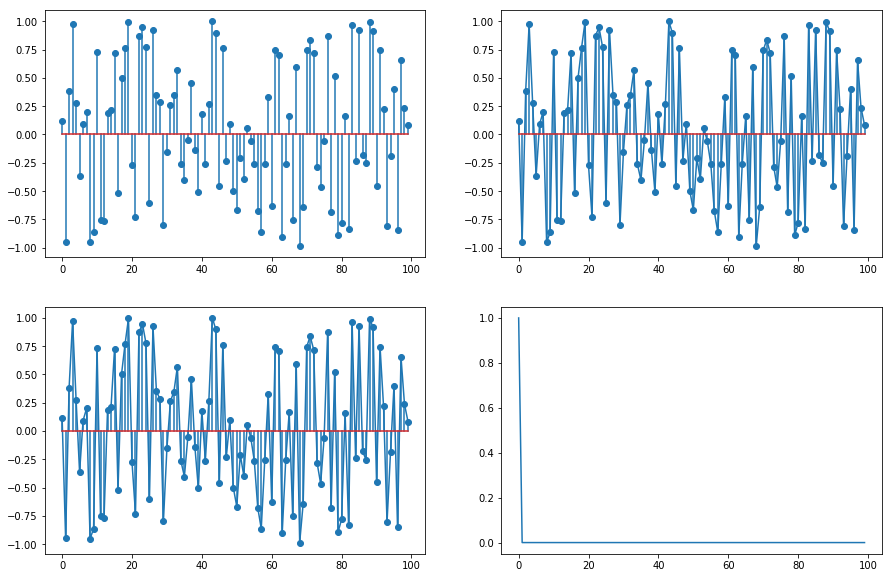

In [10]:
from random import *

N = 100
step = 1
x = arange(0, N, step)

y = zeros(x.size)
y = [2*random()-1 for x in range(0, x.size)]
# for i in range(0, 100, 10):
#     y[i] = 2*random()-1
####################################################
tri = zeros(x.size)
w = 1
for i in range(0, x.size):
    if abs(i) > w:
        tri[i] = 0
    elif i <= 0:
        tri[i] = i/w + 1
    elif i > 0:
        tri[i] = 1 - i/w

tri_inter = convolve(y, tri)
tri_inter = tri_inter[:x.size]
####################################################
sqr = zeros(x.size)
w = 1
for i in range(0, x.size):
    j = i
    if abs(j) > 0.5*w:
        sqr[i] = 0
    elif j == 0.5*w:
        sqr[i] = 0.5
    elif abs(j) < 0.5*w:
        sqr[i] = 1

sqr_inter = convolve(y, sqr)
sqr_inter = sqr_inter[:x.size]
####################################################
figure(figsize=(15, 10))
subplot(2, 2, 1)
stem(x, y)

subplot(2, 2, 2)
plot(x, tri_inter)
stem(x, y)

subplot(2, 2, 3)
plot(x, sqr_inter)
stem(x, y)

subplot(2, 2, 4)
plot(x, sqr)

1576060496.74
91.97572883774014
2602991111.07
94.15472685043206


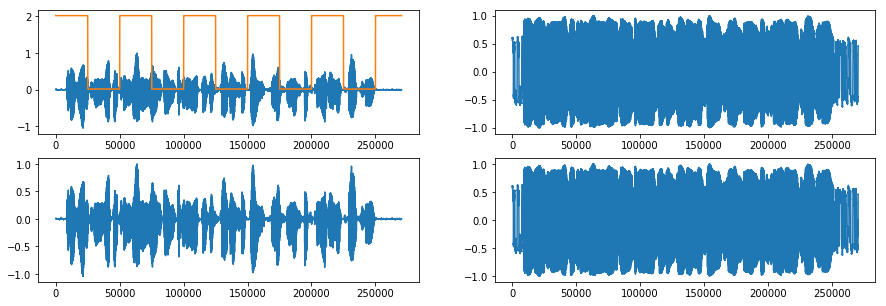

In [119]:
from ipywidgets import HTML
from IPython.display import display
from IPython.display import Audio
from scipy.io.wavfile import read
from scipy import signal

b = 16
l = 2**b -1

Fs, y = read("zdanie.wav")
T = y.size
x = arange(0, T, 1)
mask = signal.square(2*pi*0.00002*x)+1.02
# mf = 0.00002
# mask = signal.square(2*pi*mf*x) + 1
# mask += signal.square(2*pi*2*mf*x)
y = y.astype(float) / y.max()
y = y

y_q = floor(y*l)/l

noise = y - y_q
snr = var(y_q)/var(noise)
snr_db = 10*math.log(snr, 10)
print(snr)
print(snr_db)

mi = l
y_c = sign(y)*log(1 + mi*abs(y))/log(1 + mi)

y_cq = floor(y_c*l)/l

yc = sign(y_cq)*(1/mi)*((1+mi)**(abs(y_cq))-1)
noise = y - yc
snr = var(y_c)/var(noise)
snr_db = 10*math.log(snr, 10)
print(snr)
print(snr_db)

figure(figsize=(15, 5))
subplot(2, 2, 1)
plot(x, y)
plot(x, mask)
subplot(2, 2, 2)
plot(x, y_c)
subplot(2, 2, 3)
plot(x, y_q)
subplot(2, 2, 4)
plot(x, y_cq)

display(Audio(y_c, rate=fs))


# Praca domowa

## Zadanie 1

Wczytaj sygnał z pliku i zmniejsz jego częstotliwość próbkowania o połowę kopiując co drugą próbkę. Zobrazuj zjawisko aliasingu przez analizę częstotliwościową przed i po zmianie próbkowania.

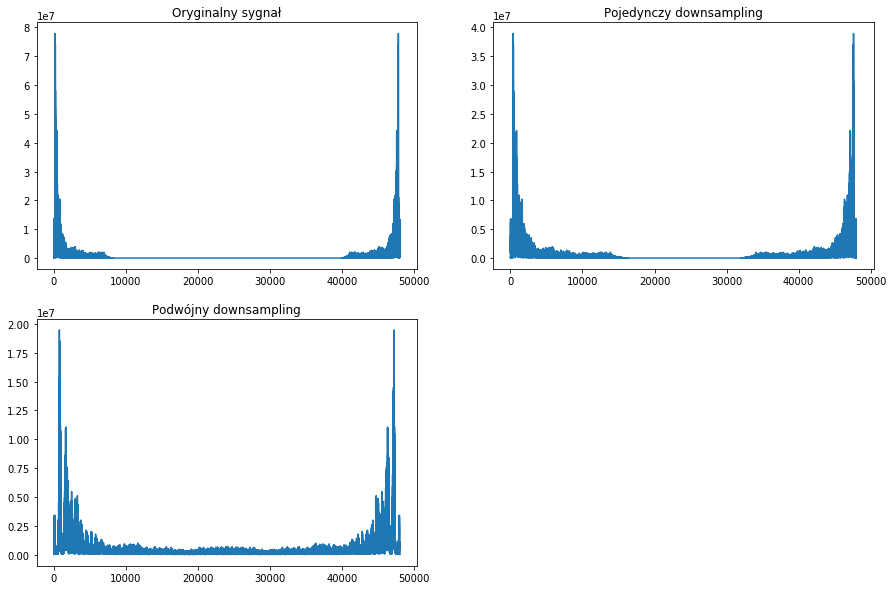

In [89]:
from ipywidgets import HTML
from IPython.display import display
from IPython.display import Audio
from scipy.io.wavfile import read 

fs, y = read("zdanie.wav")

x = arange(0, y.size, 1)
x_down = arange(0, y.size, 2)
x_down2 = arange(0, y.size, 4)

y_down = y[np.where(x%2 == 0)]
y_down2 = y[np.where(x%4 == 0)]

Y = fft.fft(y)
Y_down = fft.fft(y_down)
Y_down2 = fft.fft(y_down2)

f = linspace(0, fs, Y.size)
f_down = linspace(0, fs, Y_down.size)
f_down2 = linspace(0, fs, Y_down2.size)

figure(figsize=(15, 10))
subplot(2, 2, 1)
title("Oryginalny sygnał")
plot(f, abs(Y))

subplot(2, 2, 2)
title("Pojedynczy downsampling")
plot(f_down, abs(Y_down))

subplot(2, 2, 3)
title("Podwójny downsampling")
plot(f_down2, abs(Y_down2))

# subplot(2, 2, 4)
# plot(x, y)

display(Audio(y, rate=fs))
display(Audio(y_down, rate=0.5*fs))
display(Audio(y_down2, rate=0.25*fs))

Oryginalny dźwięk był próbkowany z częstotliwością 48 kHz, a składowa sygnału o najwyższej częstotliwości to ~8 kHz.

W związku z tym po pojedynczym downsamplingu nie przekroczono jeszcze progu $\omega_s>2\omega_{max}$. Dopiero po kolejnym downsamplingu widać nakładanie na siebie oryginalnego widma z aliasem.

## Zadanie 2

Wczytaj sygnał z pliku i dokonaj jego kwantyzacji na wiele różnych sposobów. Zmierz SNR sygnału i zrób wykres porównujący SNR do głebi bitowej dźwięku.

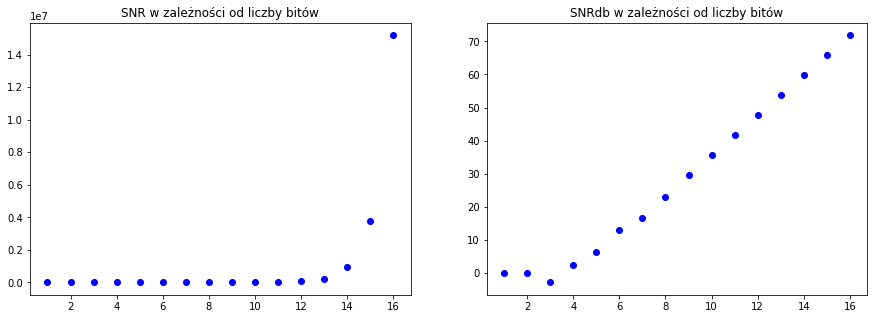

In [155]:
from scipy.io.wavfile import read

fs, y = read("zdanie.wav")

y = y.astype(float) - y.min()
y = y.astype(float)/y.max()

# skalowanie sygnału żeby mieć małe amplitudy
y=y*0.2

snrs = zeros(16)
snrs_db = zeros(16)
for b in range (3, 17):
    l = (2**b) - 1 
    z = floor(l*y)/l
    
    noise = y - z
    
    snr = var(z)/var(noise)
    snr_db = 10*math.log(snr, 10)
    snrs[b-1] = snr
    snrs_db[b-1] = snr_db

x = arange(1, 17, 1)

figure(figsize=(15,5))
subplot(1,2,1)
title("SNR w zależności od liczby bitów")
plot(x, snrs, "bo")

subplot(1,2,2)
title("SNRdb w zależności od liczby bitów")
plot(x, snrs_db, "bo")

## Zadanie 3

Zrób to samo co w zadaniu 2, ale użyj metody kodowania $\mu$-law.

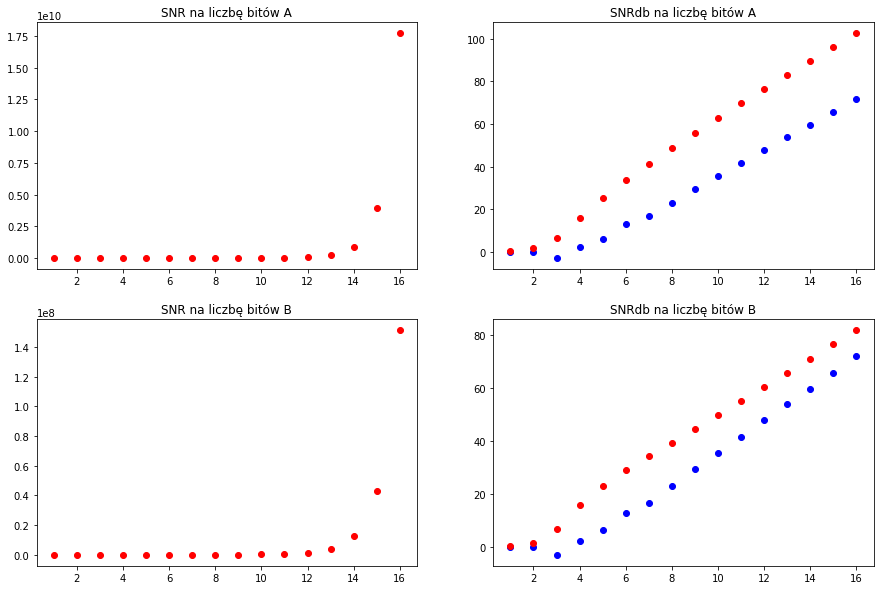

In [154]:
from ipywidgets import HTML
from IPython.display import display
from IPython.display import Audio
from scipy.io.wavfile import read 

fs, y = read("zdanie.wav")
y = y.astype(float) / y.max()

# skalowanie sygnału żeby mieć małe amplitudy
y = y*0.2

snrsmuA = zeros(16)
snrsmuA_db = zeros(16)
snrsmuB = zeros(16)
snrsmuB_db = zeros(16)
for b in range (1, 17):
    mi = (2**b)-1
    yu = sign(y)*log(1 + mi*abs(y))/log(1 + mi)
    uc = floor(mi*yu)/mi
    yc = sign(uc)*(1/mi)*((1+mi)**(abs(uc))-1)
    
    noiseA = yu - uc
    noiseB = y - yc
        
    snrA = var(uc)/var(noiseA)
    snrA_db = 10*math.log(snrA, 10)
    snrsmuA[b-1] = snrA
    snrsmuA_db[b-1] = snrA_db
    
    snrB = var(yc)/var(noiseB)
    snrB_db = 10*math.log(snrB, 10)
    snrsmuB[b-1] = snrB
    snrsmuB_db[b-1] = snrB_db
    
#     display(Audio(yc, rate=fs))

x = arange(1, 17, 1)

figure(figsize=(15,10))
subplot(2,2,1)
title("SNR na liczbę bitów A")
plot(x, snrsmuA, "ro")

subplot(2,2,2)
title("SNRdb na liczbę bitów A")
plot(x, snrs_db, "bo")
plot(x, snrsmuA_db, "ro")

subplot(2,2,3)
title("SNR na liczbę bitów B")
plot(x, snrsmuB, "ro")

subplot(2,2,4)
title("SNRdb na liczbę bitów B")
plot(x, snrs_db, "bo")
plot(x, snrsmuB_db, "ro")

$\mu$-law został stworzony aby lepiej kodować małe sygnały, ze względu na to sygnał został przemnożony przez stałą 0.2 aby zasymulować sygnał o niskich amplitudach i lepiej podkreślić przewagę $\mu$-law